# **Setup**

In [ ]:
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations

In [ ]:
# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Path to files
excel_report_path = '/content/drive/Shareddrives/NextGen Cloud Service Broker/Service Specification/4 - Linguistic Analysis + Mapping Phase/Keyword Extraction dataset'

# **1) Analysis of Single Features**

In [ ]:
# Empty dataframe to contain combined data
combined_data_single_features = pd.DataFrame()

# Loop through the range of RFP files
for i in range(1, 16):
    file_name = f"RFP_{i}_final.xlsx"
    simplified_file_name = f"RFP_{i}"
    file_path = f"{excel_report_path}/{file_name}"
    print(f"Processing file {i}")

    # Read 'Single Features' sheet from the Excel file
    try:
        data = pd.read_excel(file_path, sheet_name='Single Features')
        data['File_Name'] = simplified_file_name
        combined_data_single_features = pd.concat([combined_data_single_features, data])
    except FileNotFoundError:
        print(f"File not found: {file_path}")

# Loop for the special files
extra_files = ['RFP_TEST_final.xlsx', 'AI_generated_final.xlsx']
for file_name in extra_files:
    simplified_file_name = file_name.split('_final')[0]
    file_path = f"{excel_report_path}/{file_name}"
    print(f"Processing file {file_name}")

    # Read 'Single Features' sheet from the Excel file
    try:
        data = pd.read_excel(file_path, sheet_name='Single Features')
        data['File_Name'] = simplified_file_name
        combined_data_single_features = pd.concat([combined_data_single_features, data])
    except FileNotFoundError:
        print(f"File not found: {file_path}")


Processing file 1
Processing file 2
Processing file 3
Processing file 4
Processing file 5
Processing file 6
Processing file 7
Processing file 8
Processing file 9
Processing file 10
Processing file 11
Processing file 12
Processing file 13
Processing file 14
Processing file 15
Processing file RFP_TEST_final.xlsx
Processing file AI_generated_final.xlsx


## **Test with a single feature**
Test cell to find out in how many documents a particular feature is present

In [ ]:
FEATURE_TO_LOOK = 'Scaling'

files = combined_data_single_features[combined_data_single_features['Feature'] == FEATURE_TO_LOOK]

# Estrai i nomi dei file
count_results = files['File_Name'].unique()

len(count_results)

17

## **1.1) Which are the most frequent features**

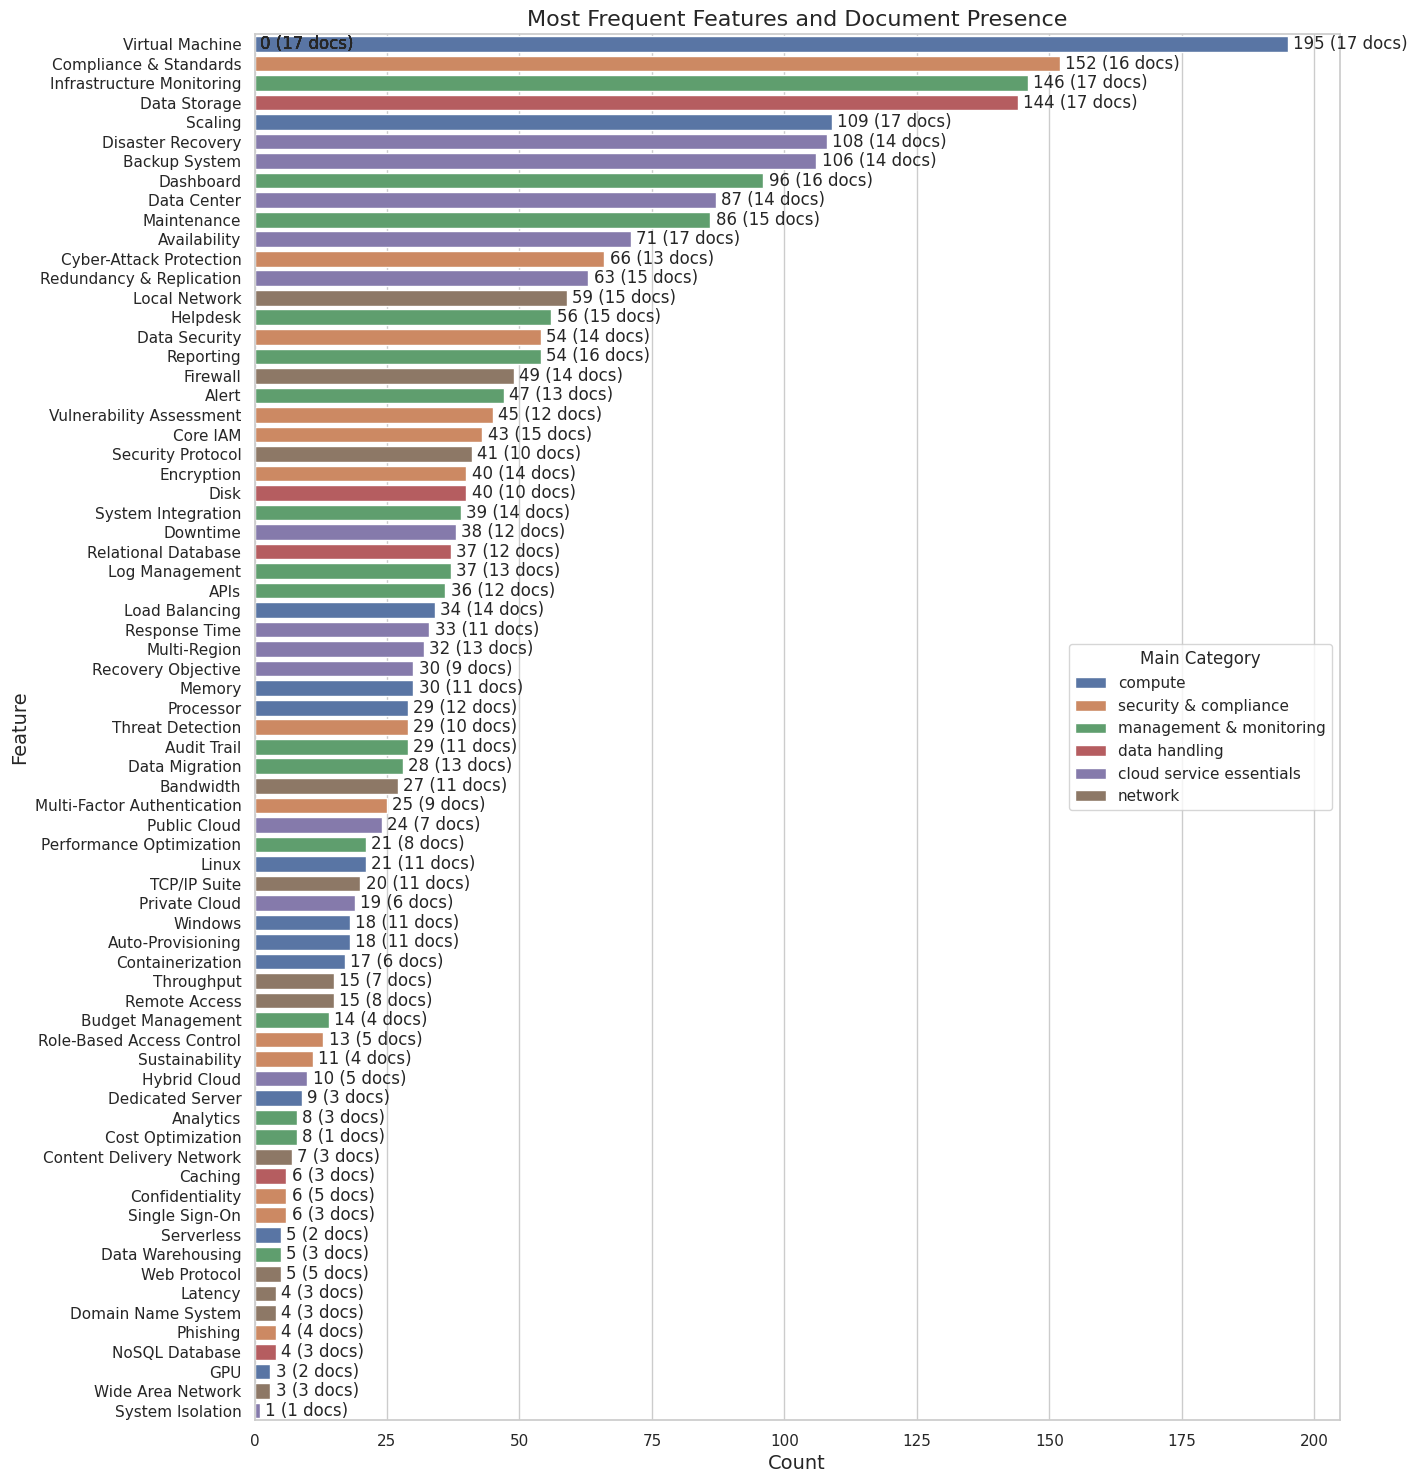

In [ ]:
# Grouping by 'Feature' and 'Main Category'. Then sum 'Count'
grouped_data_by_feature_category = combined_data_single_features.groupby(['Feature', 'Main Category'])['Count'].sum().reset_index()

# Count 'File_Name' unique for each 'Feature'
feature_file_count = combined_data_single_features.groupby(['Feature'])['File_Name'].nunique().reset_index(name='Document Count')

# Merging the two
grouped_data_by_feature_category = pd.merge(grouped_data_by_feature_category, feature_file_count, on='Feature')

# Ordering descending
grouped_data_by_feature_category = grouped_data_by_feature_category.sort_values(by='Count', ascending=False)


sns.set(style="whitegrid")

# All are shown
top_features = grouped_data_by_feature_category.head(100)

plt.figure(figsize=(14, 18))
barplot = sns.barplot(x='Count', y='Feature', hue='Main Category', data=top_features, dodge=False)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Feature', fontsize=14)
plt.title('Most Frequent Features and Document Presence', fontsize=16)

# Bar annotations
for p in barplot.patches:
    width = p.get_width()

    feature = barplot.get_yticklabels()[int(p.get_y() + p.get_height() / 2)].get_text()
    doc_count = feature_file_count[feature_file_count['Feature'] == feature]['Document Count'].values[0]

    plt.text(width + 1,
             p.get_y() + p.get_height() / 2,
             f'{int(width)} ({doc_count} docs)',
             ha='left',
             va='center')

plt.legend(title='Main Category', loc='center right')

plt.show()

## **1.2) The least popular features**

In [ ]:
grouped_data_by_least_category = grouped_data_by_feature_category.sort_values(by='Count', ascending=True).head(5)
grouped_data_by_least_category

,Feature,Main Category,Count,Document Count
62,System Isolation,cloud service essentials,1,1
69,Wide Area Network,network,3,3
30,GPU,compute,3,2
43,NoSQL Database,data handling,4,3
45,Phishing,security & compliance,4,4


# **2) How features interact each other**

In [ ]:
# Empty dataframe to contain combined data
combined_data = pd.DataFrame()

# Loop through the range of RFP files
for i in range(1, 16):
    file_name = f"RFP_{i}_final.xlsx"
    simplified_file_name = f"RFP_{i}"
    file_path = f"{excel_report_path}/{file_name}"
    print(f"Processing file {i}")

    # Read 'Combinations Features' sheet from the Excel file
    try:
        data = pd.read_excel(file_path, sheet_name='Combinations Features')
        data['File_Name'] = simplified_file_name
        combined_data = pd.concat([combined_data, data])
    except FileNotFoundError:
        print(f"File not found: {file_path}")

# Loop for the extra files
extra_files = ['RFP_TEST_final.xlsx', 'AI_generated_final.xlsx']
for file_name in extra_files:
    simplified_file_name = file_name.split('_final')[0]
    file_path = f"{excel_report_path}/{file_name}"
    print(f"Processing file {file_name}")

    # Read 'Combinations Features' sheet from the Excel file
    try:
        data = pd.read_excel(file_path, sheet_name='Combinations Features')
        data['File_Name'] = simplified_file_name
        combined_data = pd.concat([combined_data, data])
    except FileNotFoundError:
        print(f"File not found: {file_path}")


Processing file 1
Processing file 2
Processing file 3
Processing file 4
Processing file 5
Processing file 6
Processing file 7
Processing file 8
Processing file 9
Processing file 10
Processing file 11
Processing file 12
Processing file 13
Processing file 14
Processing file 15
Processing file RFP_TEST_final.xlsx
Processing file AI_generated_final.xlsx


## **2.1) How exactly the sentences were classified**

In [ ]:
def aggregate_data(group):
    total_count = group['Count'].sum()
    file_list = group['File_Name'].unique().tolist()
    return pd.Series({
        'Count': total_count,
        'File_List': file_list,
    })

# Group by 'Cloud Features Combination' including empty combinations using the custom aggregation function
grouped_data = combined_data.groupby('Cloud Features Combination', dropna=False).apply(aggregate_data)

# Sort the data by 'Count' in descending order
grouped_data = grouped_data.sort_values(by='Count', ascending=False).reset_index()

grouped_data

,Cloud Features Combination,Count,File_List
0,NaN,239,"[RFP_1, RFP_2, RFP_3, RFP_4, RFP_5, RFP_6, RFP..."
1,Compliance & Standards,84,"[RFP_1, RFP_2, RFP_3, RFP_4, RFP_5, RFP_6, RFP..."
2,Infrastructure Monitoring,43,"[RFP_2, RFP_3, RFP_5, RFP_6, RFP_7, RFP_8, RFP..."
3,Backup System,42,"[RFP_2, RFP_3, RFP_5, RFP_6, RFP_7, RFP_8, RFP..."
4,Virtual Machine,40,"[RFP_2, RFP_3, RFP_5, RFP_6, RFP_7, RFP_8, RFP..."
...,...,...,...
498,"Core IAM, Single Sign-On",1,[RFP_5]
499,"Cyber-Attack Protection, Alert, Phishing, Vuln...",1,[RFP_5]
500,"Maintenance, Dashboard, Infrastructure Monitoring",1,[RFP_11]
501,"Maintenance, Dashboard",1,[RFP_4]


<ipython-input-10-c4f30977a5a3>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='Count', y='Cloud Features Combination', data=top_data, palette='viridis')


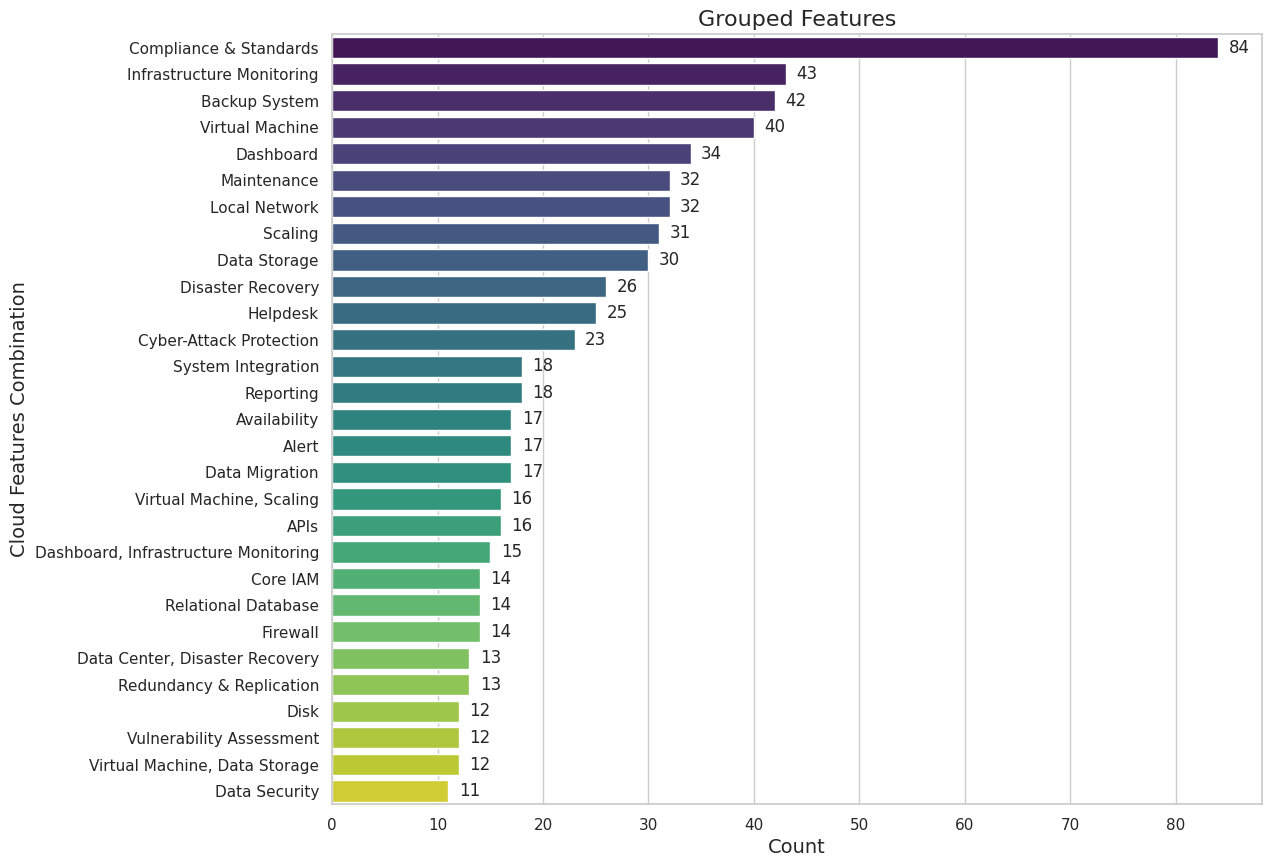

In [ ]:
# Filter out empty rows
filtered_data = grouped_data[grouped_data['Cloud Features Combination'] != '']

# Select the top combinations
top_data = filtered_data.head(30)

# Apply the seaborn style
sns.set(style="whitegrid")


plt.figure(figsize=(12, 10))
barplot = sns.barplot(x='Count', y='Cloud Features Combination', data=top_data, palette='viridis')

# Add labels and title
plt.xlabel('Count', fontsize=14)
plt.ylabel('Cloud Features Combination', fontsize=14)
plt.title('Grouped Features', fontsize=16)

# Annotate the bars with the count values
for p in barplot.patches:
    width = p.get_width()    # get bar length
    plt.text(width + 1,       # set the text at 1 unit right of the bar
             p.get_y() + p.get_height() / 2, # get Y coordinate + half of bar height
             '{:1.0f}'.format(width), # set variable to display, 2 decimals
             ha = 'left',   # horizontal alignment
             va = 'center') # vertical alignment

plt.show()


## **2.2) We only filter sentences with multi-feature combinations (at most 2 features)**

<ipython-input-11-da0f442101fc>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='Count', y='Cloud Features Combination', data=top_multi_features, palette="coolwarm")


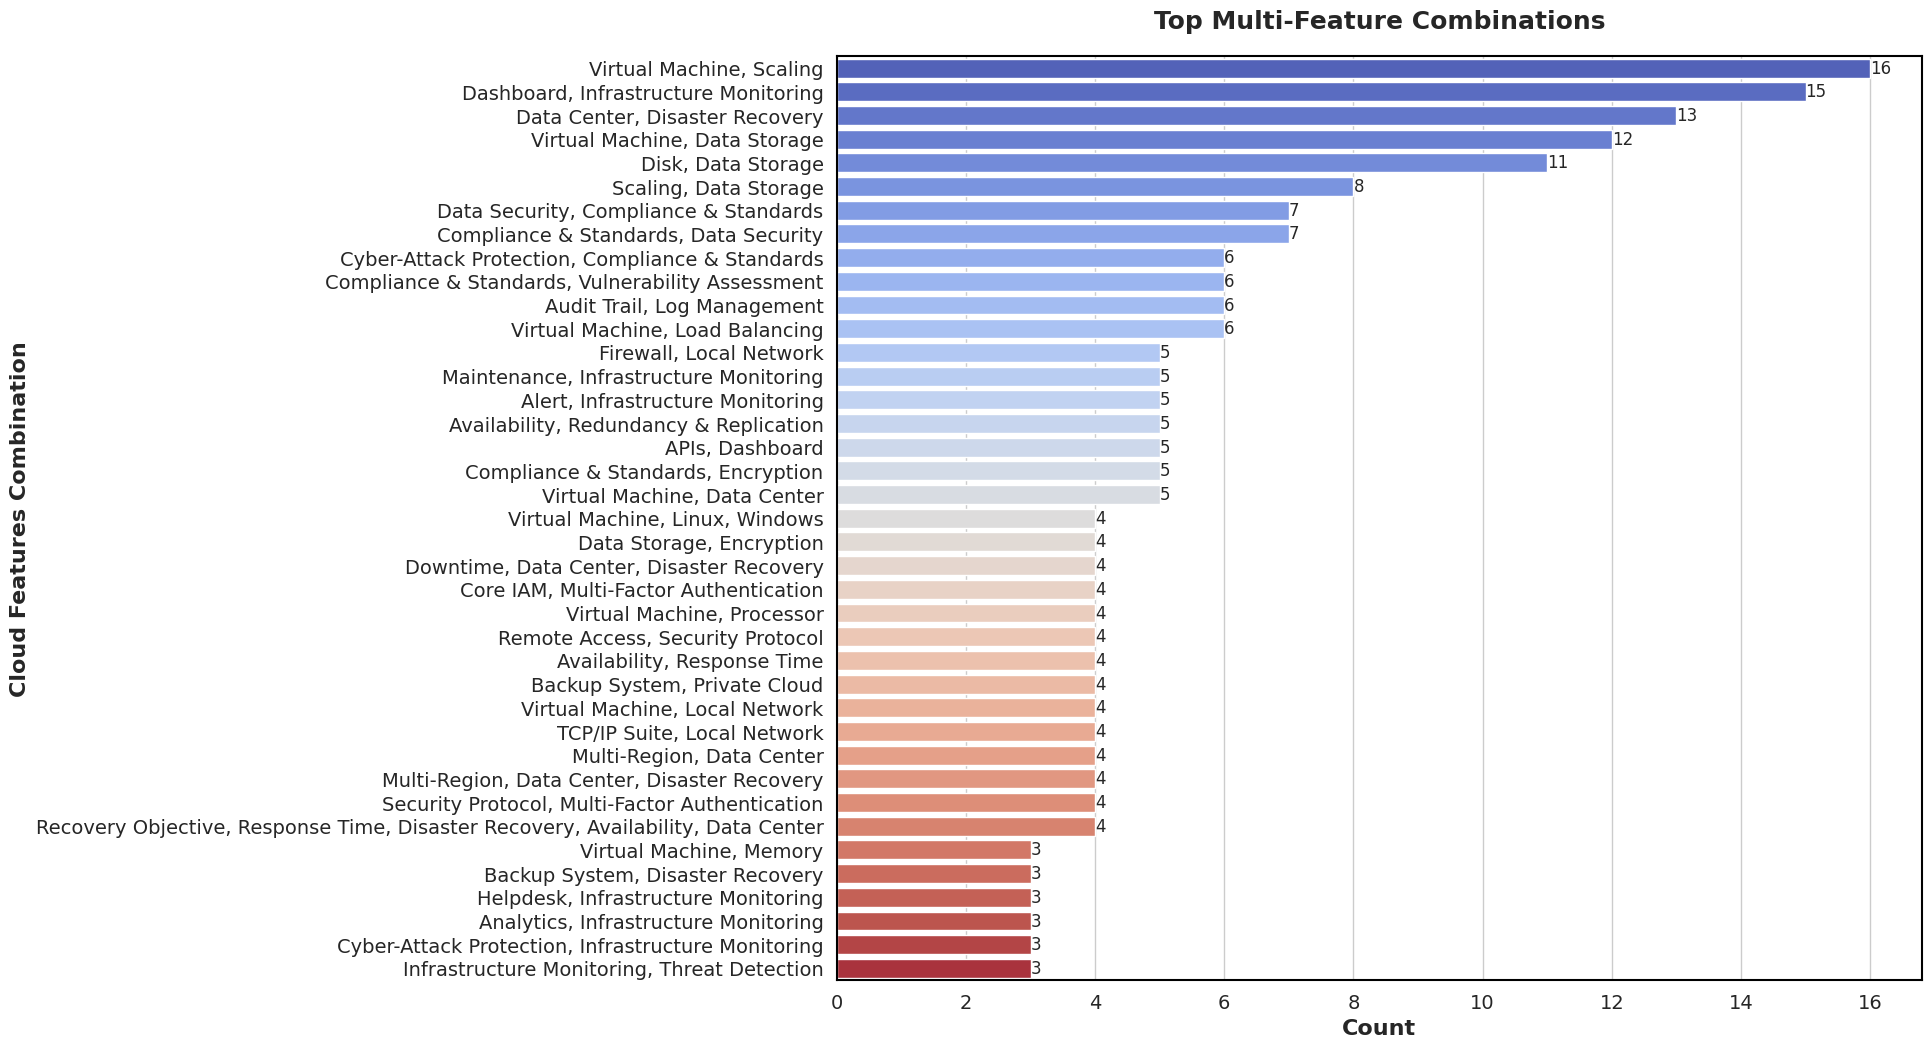

In [ ]:
# Ensure to filter out or handle NaN values before applying the string filter
grouped_data = grouped_data.dropna(subset=['Cloud Features Combination'])

# Filter to get only combinations with more than one feature
multi_feature_data = grouped_data[grouped_data['Cloud Features Combination'].str.contains(',')]

# Sort the data by 'Count' in descending order
sorted_multi_feature_data = multi_feature_data.sort_values(by='Count', ascending=False)

# Select the top 40 combinations
top_multi_features = sorted_multi_feature_data.head(39)

# Set a more sophisticated theme and palette
sns.set_theme(style="whitegrid", palette="muted")

# Create a bar plot for the top 40 multi-feature combinations
plt.figure(figsize=(14, 12))
barplot = sns.barplot(x='Count', y='Cloud Features Combination', data=top_multi_features, palette="coolwarm")

# Add labels and title with improved font settings
plt.xlabel('Count', fontsize=16, weight='bold')
plt.ylabel('Cloud Features Combination', fontsize=16, weight='bold')
plt.title('Top Multi-Feature Combinations', fontsize=18, weight='bold', pad=20)

# Customize the font size of tick labels
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Annotate the bars with the count values
for p in barplot.patches:
    width = p.get_width()    # get bar length
    plt.text(width,       # set the text at 1 unit right of the bar
             p.get_y() + p.get_height() / 2, # get Y coordinate + half of bar height
             '{:1.0f}'.format(width), # set variable to display, no decimals
             ha = 'left',   # horizontal alignment
             va = 'center', # vertical alignment
             fontsize=12)

for spine in plt.gca().spines.values():
    spine.set_visible(True)
    spine.set_color('black')
    spine.set_linewidth(1.5)

plt.show()

## **2.3) What features are most frequently found together in sentences (not necessarily in pairs alone)**

In [ ]:
# Initialize an empty dictionary to hold the counts of feature combinations
feature_combinations = {}

# Iterate over each row in the DataFrame
for index, row in combined_data.iterrows():
    # Check if 'Cloud Features Combination' is not NaN by verifying it's a string
    if isinstance(row['Cloud Features Combination'], str):
        # Split the features and create all combinations of two
        features = sorted(row['Cloud Features Combination'].split(', '))
        for combo in combinations(features, 2):
            combo = tuple(sorted(combo))  # Sort the tuple to avoid duplicates like (A, B) and (B, A)
            feature_combinations[combo] = feature_combinations.get(combo, 0) + row['Count']

# Create a DataFrame from the dictionary
co_occurrence_df = pd.DataFrame(list(feature_combinations.items()), columns=['Feature_Pair', 'Count'])

# Split the Feature_Pair tuple into two separate columns
co_occurrence_df[['Feature_1', 'Feature_2']] = pd.DataFrame(co_occurrence_df['Feature_Pair'].tolist(), index=co_occurrence_df.index)
co_occurrence_df.drop('Feature_Pair', axis=1, inplace=True)

# Reorder columns
co_occurrence_df = co_occurrence_df[['Feature_1', 'Feature_2', 'Count']]

# Sort the DataFrame by 'Count' in descending order
co_occurrence_df = co_occurrence_df.sort_values(by='Count', ascending=False)

# Filter out zero occurrences (if any)
co_occurrence_df = co_occurrence_df[co_occurrence_df['Count'] != 0]

co_occurrence_df


,Feature_1,Feature_2,Count
98,Data Center,Disaster Recovery,45
53,Scaling,Virtual Machine,38
0,Data Storage,Virtual Machine,32
6,Data Storage,Scaling,26
47,Compliance & Standards,Data Security,25
...,...,...,...
417,Data Center,Load Balancing,1
416,Data Center,Firewall,1
409,Local Network,Scaling,1
402,Encryption,Response Time,1


<ipython-input-13-be3f471a2aef>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_co_occurrences['Feature Pair'] = top_co_occurrences['Feature_1'] + ", " + top_co_occurrences['Feature_2']
<ipython-input-13-be3f471a2aef>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='Count', y='Feature Pair', data=top_co_occurrences, palette="Spectral")


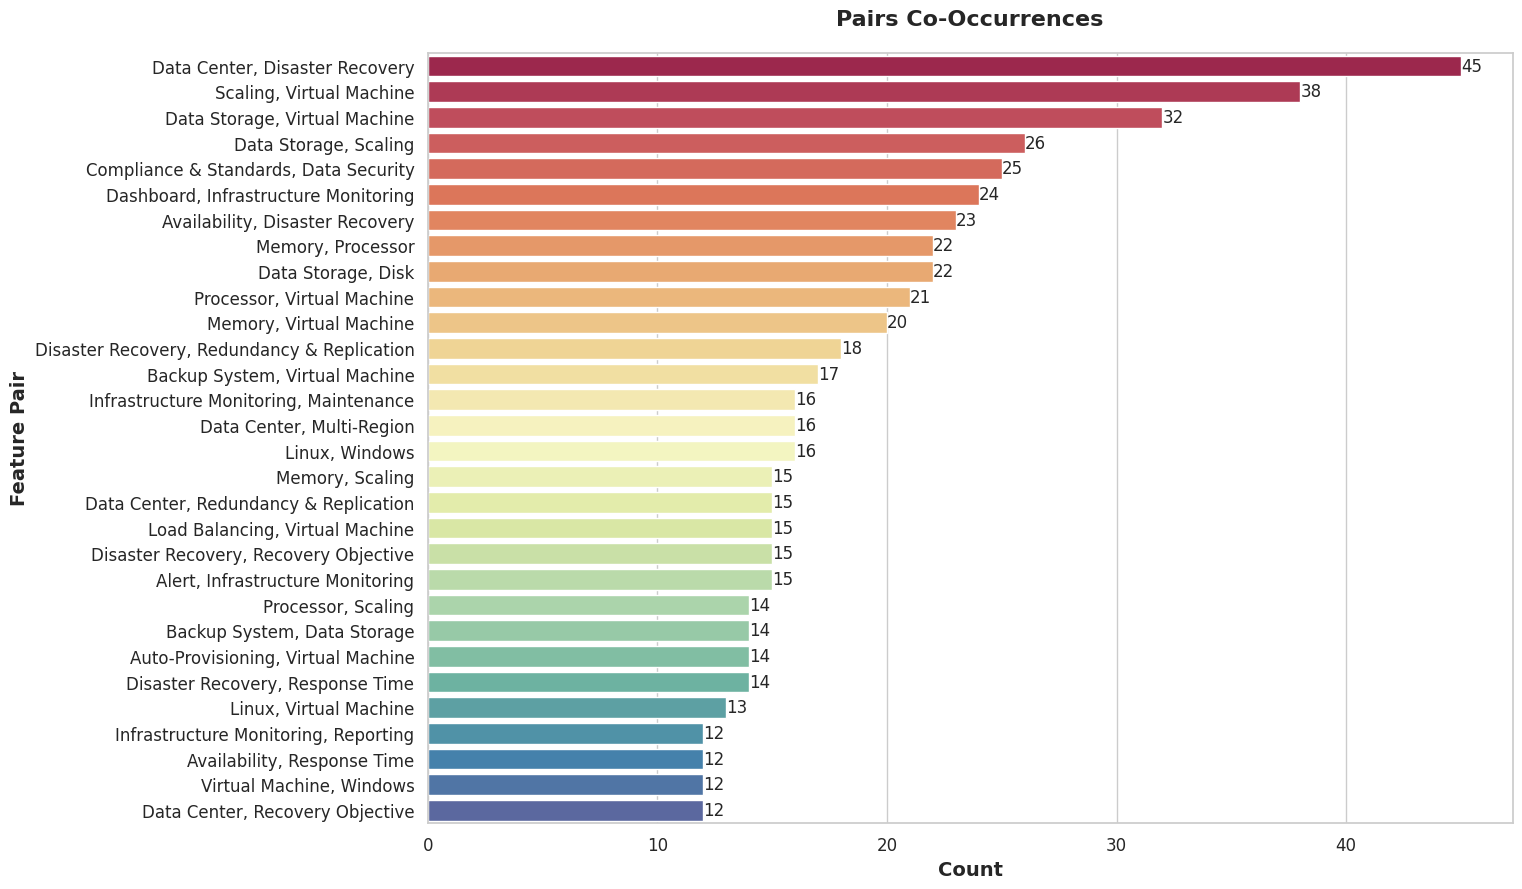

In [ ]:
# Select the top feature co-occurrences
top_co_occurrences = co_occurrence_df.head(30)

# Combine the feature pairs into a single string for plotting
top_co_occurrences['Feature Pair'] = top_co_occurrences['Feature_1'] + ", " + top_co_occurrences['Feature_2']

# Apply the seaborn style for a more aesthetic plot
sns.set(style="whitegrid")

# Create a horizontal bar plot for the top feature co-occurrences
plt.figure(figsize=(14, 10))
barplot = sns.barplot(x='Count', y='Feature Pair', data=top_co_occurrences, palette="Spectral")

# Add labels and title with improved font settings
plt.xlabel('Count', fontsize=14, weight='bold')
plt.ylabel('Feature Pair', fontsize=14, weight='bold')
plt.title('Pairs Co-Occurrences', fontsize=16, weight='bold', pad=20)

# Customize the font size of tick labels
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Annotate the bars with the count values
for p in barplot.patches:
    width = p.get_width()    # get bar length
    plt.text(width ,       # set the text at 1 unit right of the bar
             p.get_y() + p.get_height() / 2, # get Y coordinate + half of bar height
             '{:1.0f}'.format(width), # set variable to display, 2 decimals
             ha = 'left',   # horizontal alignment
             va = 'center', # vertical alignment
             fontsize=12)

plt.show()


# **3) Requirements without matches**

# **3.1) What is the ratio of the sentences without any match to the total sentences**


<ipython-input-14-c2208df778db>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='File_Name', y='No_Keyword_Ratio', data=merged_data, palette='viridis')


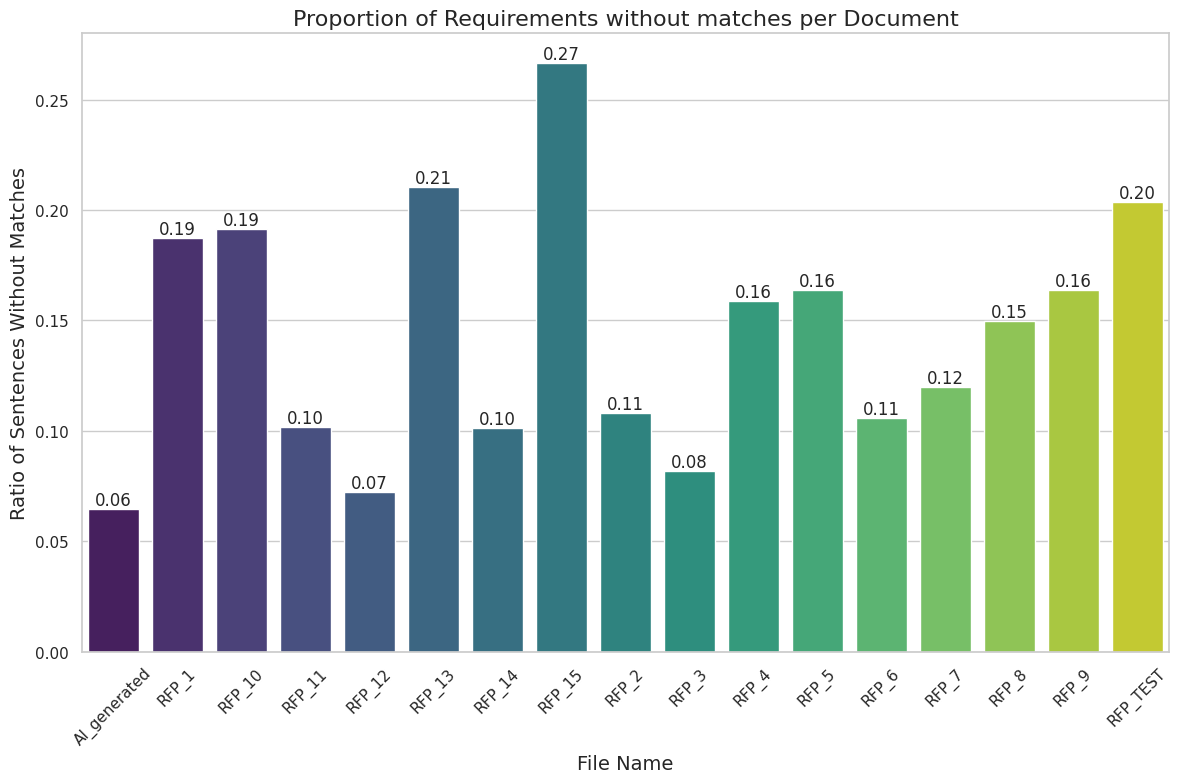

In [ ]:
# Calculate the total count of sentences per file
total_sentences_per_file = combined_data.groupby('File_Name')['Count'].sum().reset_index(name='Total_Sentences')

# Calculate the count of sentences with no keyword matches
no_keyword_data = combined_data[pd.isna(combined_data['Cloud Features Combination'])]
no_keyword_counts = no_keyword_data.groupby('File_Name')['Count'].sum().reset_index(name='No_Keyword_Count')

# Merge the two datasets to calculate the ratio of no keyword matches
merged_data = pd.merge(no_keyword_counts, total_sentences_per_file, on='File_Name')
merged_data['No_Keyword_Ratio'] = merged_data['No_Keyword_Count'] / merged_data['Total_Sentences']

sns.set(style="whitegrid")

# Create a bar plot for the ratio of sentences without matches
plt.figure(figsize=(12, 8))
barplot = sns.barplot(x='File_Name', y='No_Keyword_Ratio', data=merged_data, palette='viridis')

# Add labels and title
plt.xlabel('File Name', fontsize=14)
plt.ylabel('Ratio of Sentences Without Matches', fontsize=14)
plt.title('Proportion of Requirements without matches per Document', fontsize=16)
plt.xticks(rotation=45)

# Annotate the bars with the ratio values
for p in barplot.patches:
    height = p.get_height()  # get bar height
    plt.text(p.get_x() + p.get_width() / 2.,  # x-coordinate position of data label, centered to the middle of the bar
             height,  # y-coordinate position of data label, placed at the top of the bar
             '{:.2f}'.format(height),  # data label, formatted to two decimals
             ha='center',  # horizontal alignment
             va='bottom')  # vertical alignment

plt.tight_layout()
plt.show()

In [ ]:
# Calculate the mean, median, and standard deviation of the sentence ratio
total_no_keyword_count = no_keyword_counts['No_Keyword_Count'].sum()
total_sentences = total_sentences_per_file['Total_Sentences'].sum()

mean_ratio = merged_data['No_Keyword_Ratio'].mean()
median_ratio = merged_data['No_Keyword_Ratio'].median()
std_dev_ratio = merged_data['No_Keyword_Ratio'].std()

# Print the calculated statistics
print(f"Total number of sentences without matches: {total_no_keyword_count} / {total_sentences}")
print(f"Mean Sentence Ratio: {mean_ratio:.2f}")
print(f"Median Sentence Ratio: {median_ratio:.2f}")
print(f"Standard Deviation of Sentence Ratio: {std_dev_ratio:.2f}")


Total number of sentences without matches: 239 / 1785
Mean Sentence Ratio: 0.14
Median Sentence Ratio: 0.15
Standard Deviation of Sentence Ratio: 0.06
